In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
features = pd.read_pickle("/home/rodrigo.busto/Desktop/facul/3CCO-2021-1-Grupo-08/api-python/analysis/ml_models/pre_processed_data/consumidores_cluster.pkl")

In [3]:
features = features.astype({"faixa_etaria":"category", "uf":"category", "cidade":"category"})
features.faixa_etaria = features.faixa_etaria.cat.codes
features.uf = features.uf.cat.codes
features.cidade = features.cidade.cat.codes

In [4]:
Y = features["cluster"].values
features = features.drop(columns = ["cluster", "id_consumidor_ecommerce"])
X = features.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 70)

In [5]:
clf = DecisionTreeClassifier(min_samples_leaf=10)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=10)

## Árvore de decisão

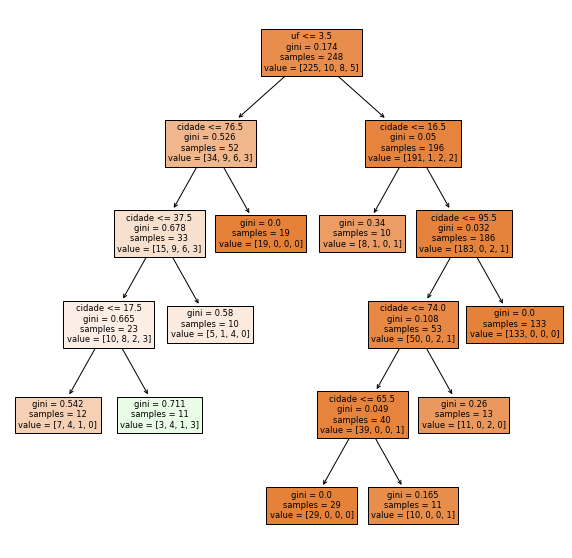

In [7]:
plt.figure(figsize=(10,10))
plot_tree(clf, feature_names=features.columns, filled =True)
plt.show()

In [9]:
Y_pred = clf.predict(X_test)
ac_score = metrics.accuracy_score(Y_test, Y_pred)

In [14]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = ac_score,
    domain = { "x": [0, 1], "y": [0, 1] },
    title = { "text": "Accuracy score do modelo" },
    gauge = { 
            "axis": {"range": [0, 1]},
            "bar": {"color": "#d8d3ed" },
            "steps": [
                { "range": [ 0, 0.3 ], "color": "#3b82f5" },
                { "range": [0.3, 0.5], "color": "#5432fc" },
                { "range": [0.5, 0.7], "color": "#927ef7" },
                { "range": [0.7, 1], "color": "#c8bef7" },
            ],
            "threshold": {"line": {"color": "#444445", "width": 4}, "thickness": 0.75, "value": ac_score}
        }
))
fig.show()

## Matriz de confusão

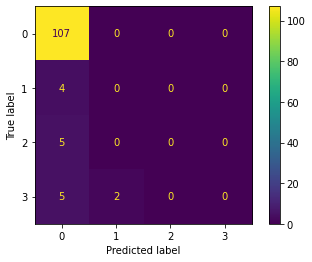

In [8]:
metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)